# Model Evaluation

In [1]:
# Import the Titanic data
import pandas as pd
titanic = pd.read_csv('../../data/titanic.csv', index_col='PassengerId')
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

In [10]:
# import the sklearn.cross_validation library
import sklearn.cross_validation
from sklearn.cross_validation import train_test_split as tts
import sklearn.model_selection

In [11]:
# Split the data into training and testing sets using train_test_split
(trainX, testX, trainY, testY) = tts(X, y)
#sklearn.cross_validation.


In [13]:
# Train your favourite predictor on the training data
import sklearn.linear_model
logreg = sklearn.linear_model.LogisticRegression(C=100000)
logreg.fit(trainX, trainY)

LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [14]:
# Use this model to predict the test data 
predictions = logreg.predict(testX)
predictions

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [29]:
logreg.coef_

array([[-0.92365807,  0.24351966]])

In [15]:
# How accurate was your model on this test data? 
predictions == testY


PassengerId
36     False
553     True
187    False
239     True
436     True
875    False
390    False
566     True
338     True
481     True
178    False
593     True
882     True
878     True
229     True
634    False
286     True
650    False
536     True
301    False
400    False
101     True
789    False
549     True
11     False
421     True
888     True
221    False
183     True
855     True
       ...  
504     True
127     True
156    False
57     False
670     True
238     True
448     True
329    False
282     True
752    False
660    False
770     True
657     True
321     True
414     True
295     True
840     True
40     False
463    False
560    False
719     True
484    False
220     True
487     True
471     True
847     True
628     True
378    False
580    False
234    False
Name: Survived, dtype: bool

In [19]:
(predictions == testY).value_counts()

True     151
False     72
Name: Survived, dtype: int64

In [20]:
import sklearn.metrics
sklearn.metrics.accuracy_score(testY, predictions)

0.67713004484304928

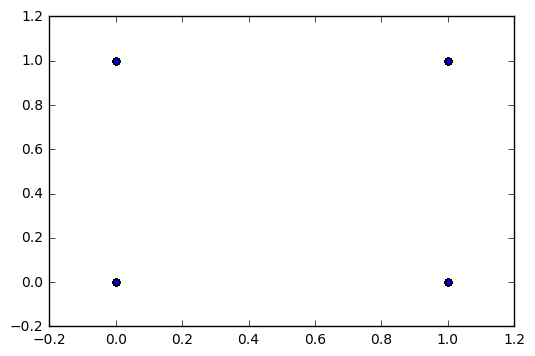

In [23]:
%matplotlib inline
import matplotlib.pyplot
matplotlib.pyplot.scatter(testY, predictions)


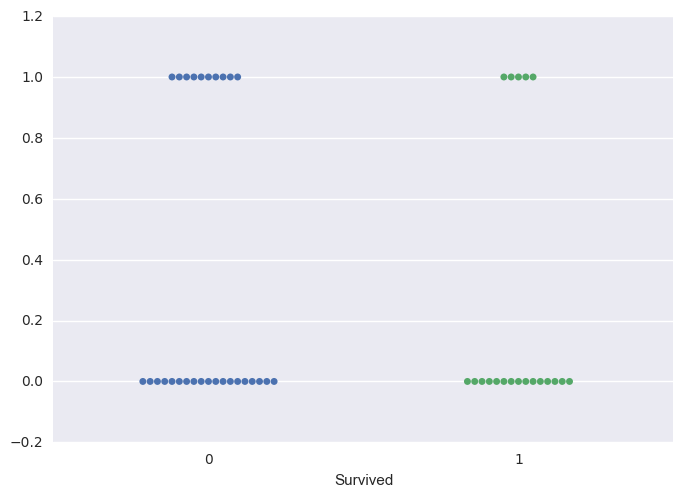

In [25]:
import seaborn
seaborn.swarmplot(testY, predictions)

### Null accuracy

Null accuracy is the accuracy that could be achieved by always predicting the **most frequent class**. It is a baseline against which you may want to measure your classifier.

In [26]:
# import the sklearn.dummy library
import sklearn.dummy

In [28]:
# How accurate is the DummyClassifier on your data?
# (Hopefully it was better than your favourite predictor)
dummy = sklearn.dummy.DummyClassifier(strategy='most_frequent')
dummy.fit(trainX, trainY)
dumb_predictions = dummy.predict(testX)
sklearn.metrics.accuracy_score(testY, dumb_predictions)

0.60538116591928248

## K-fold

In [ ]:
# Use sklearn.cross_validation.cross_val_score to test your classifier
# 10 times on different partitions